In [34]:
#Pkg.add("ProfileView")

  Resolving package versions...
  Installed Dbus_jll ─────────────── v1.12.16+3
  Installed at_spi2_atk_jll ──────── v2.34.1+4
  Installed Xorg_libXtst_jll ─────── v1.2.3+4
  Installed RoundingIntegers ─────── v0.2.0
  Installed Xorg_libXdamage_jll ──── v1.1.5+4
  Installed EllipsisNotation ─────── v1.1.0
  Installed Reactive ─────────────── v0.8.3
  Installed ProfileView ──────────── v0.6.10
  Installed at_spi2_core_jll ─────── v2.34.0+4
  Installed iso_codes_jll ────────── v4.3.0+4
  Installed hicolor_icon_theme_jll ─ v0.17.0+3
  Installed Libepoxy_jll ─────────── v1.5.4+1
  Installed GTK3_jll ─────────────── v3.24.29+0
  Installed Xorg_libXcomposite_jll ─ v0.4.5+4
  Installed IntervalSets ─────────── v0.5.3
  Installed ATK_jll ──────────────── v2.36.0+0
  Installed gdk_pixbuf_jll ───────── v2.38.2+9
  Installed adwaita_icon_theme_jll ─ v3.33.92+5
  Installed GtkReactive ──────────── v1.0.5
  Installed Gtk ──────────────────── v1.1.9
Updating `~/.julia/environments/v1.5/Project.toml`

In [7]:
using LightGraphs
using MetaGraphs
using GraphPlot
using StatsBase
using Distributions
using Random

Graph construction testing

In [2]:
g = LightGraphs.SimpleGraphs.SimpleGraph(4)
mg = MetaGraphs.MetaGraph(g)
add_edge!(mg,1,2)
add_edge!(mg,1,3)
add_edge!(mg,2,4)
add_edge!(mg,1,2)
mg

for e in edges(mg)
    nw = rand(1:4)
    set_prop!(mg,src(e),dst(e),:weights,rand(nw))
    set_prop!(mg,src(e),dst(e),:types,sample(1:4,nw))
end
for n in 1:nv(mg)
    set_prop!(mg,n,:susceptibility,rand([0.0,1.0]))
end

In [3]:
inf = [1,3,4]
inf_scales = [1.2,0.3,0.7]
ipairs = Array{Int64,2}(undef,3,0)

nbrs = neighbors.(Ref(mg), inf)
#create array of infectious nodes for each contact edge
nin = vcat(fill.(inf,length.(nbrs))...)
#flatten the other array to match
nout = vcat(nbrs...)
#get infectious node infectivity for each edge
j_inf = vcat(fill.(inf_scales,length.(nbrs))...)
#get target node susceptibility for each edge
j_susc = get_prop.(Ref(mg),nout,:susceptibility)

print(nin,'\n',nout,'\n')

#get the edge weights (total transmission rate * contact time, can be multiple per edge)
w = get_prop.(Ref(mg),nin,nout,:weights)
t = get_prop.(Ref(mg),nin,nout,:types)
#fill and flatten all arrays so there is one entry for each entry

nin_all = vcat(fill.(nin,length.(w))...)
nout_all = vcat(fill.(nout,length.(w))...)
j_inf_all = vcat(fill.(j_inf,length.(w))...)
j_susc_all = vcat(fill.(j_susc,length.(w))...)
beta = vcat(w...)
etype = vcat(t...)


print(nin_all,'\n',nout_all,'\n',beta,'\n',etype,'\n',j_inf_all,'\n',j_susc_all,'\n')


#get probability of infection on each edge
eprob = 1 .- exp.(-j_inf_all .* beta .* j_susc_all)

print(eprob,'\n')

#draw which will be infectious (duplicates don't matter)
#print(ecprob,"\n\n")
eind = collect(1:length(eprob))
einf = eind[rand(length(eprob)) .< (eprob)]

print(einf,'\n')

if length(einf) > 0
    ipairs = hcat(ipairs, [nin_all[einf], nout_all[einf], etype[einf]])
end

print(ipairs,'\n')

# nbrs = neighbors.(Ref(mg), inf)
# x = vcat(fill.(inf, length.(nbrs))...)
# vcat(nbrs...)

Car share test

In [ ]:
# NPh = 3000
# NDh = Int64(round(NPh/80))
# NDTh = Int64(round(NDh/12))
# NLh = Int64(round(NPh/150))
# NLTh = Int64(round(NLh/8))
# NOh = Int64(round(NPh/300))
# NOTh = Int64(round(NOh/5))
# print(NDh, ' ', NLh, ' ', NOh, ' ', NDTh, ' ', NLTh, ' ', NOTh, '\n')

# NPh = 300
# NDh = Int64(2*round(NPh/30))
# NLh = Int64(2*round(NPh/40))
# NOh = Int64(round(NPh/40))
# print(NDh, ' ', NLh, ' ', NOh)

#pph = 1 .+ rand(Multinomial(20, ones(40)./40))
# nr_rand = shuffle(1:60)
# cumul_pph = cumsum(pph)
# for h in 1:40
#     if pph[h] > 1
#         if h > 1
#             iph = (cumul_pph[h-1] + 1):cumul_pph[h]
#         else
#             iph = 1:cumul_pph[h]
#         end
#     end
# end

# hhs = Array{Array{Int64,1},1}(undef,0)
# for h in 1:length(pph)
#     if(h>1)
#         iph = (cumul_pph[h-1] + 1):cumul_pph[h]
#     else 
#         iph = 1:cumul_pph[h]
#     end
#     push!(hhs, nr_rand[iph])
# end

# print(hhs,'\n')

# NH = length(pph)
# nh = collect(1:NH)
# nh_rand = shuffle(nh)
# hpc = ones(NH)
# cumul_hpc = cumsum(hpc)
# cars = Array{Array{Int64,1},1}(undef,0)

# nh = collect(1:NH)
# Ncars = 30
# hpc = 1 .+ rand(Multinomial(NH - Ncars, ones(Ncars) ./ Ncars))
# cumul_hpc = cumsum(hpc)
# for c in 1:Ncars
#     car_share = Array{Int64,1}(undef,0)
#     if(c>1)
#         ipc = (cumul_hpc[c-1] + 1):cumul_hpc[c]
#     else
#         ipc = 1:cumul_hpc[c]
#     end
#     for h in nh_rand[ipc]
#         push!.(Ref(car_share), hhs[h])
#     end
#     push!(cars, car_share)
# end
# print(cars,'\n')

In [2]:
include("network_transmission_workplace.jl")

run_sim_delivery_wp (generic function with 1 method)

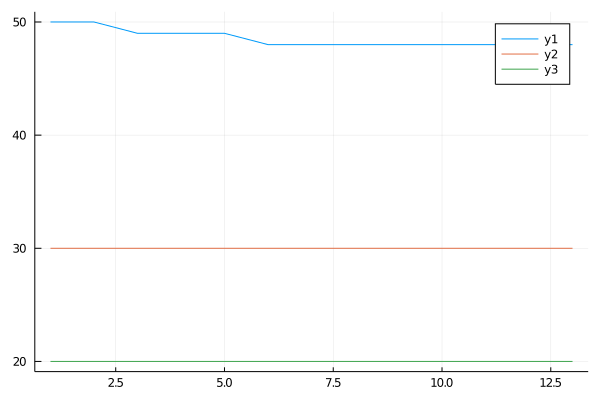

In [3]:
Params_in = Dict("ND"=>50, "NL"=>30, "NO"=>20, "NDteams"=>5, "NLteams"=>5, "NOteams"=>5,
                 "is_cohorts"=>true, "Pisol"=>0.5, "Psusc"=>1.0, "p_contact"=>(2.0/100),
                 "tD"=>0.05,"phi"=>0.1, "TeamTimes"=>[0.25,1.0,1.0], "TeamsOutside"=>[true,true,false],
                 "TeamDistances"=>[2.0,2.0,2.0], "HouseShareFactor"=>0.5, "CarShareFactor"=>1.0,
                 "SimType"=>Outbreak_sim, "InfInit"=>0)
PairParams = Dict("is_driver_pairs"=>true, "is_loader_pairs"=>true,
                  "fixed_driver_pairs"=>true, "fixed_loader_pairs"=>true,
                  "is_window_open"=>false)
Occ = ones(90)
NP = 3000*ones(Int64,90)
out = run_sim_delivery_wp(Params_in, Occ, NP; PairParams=PairParams)
plot(out["time"],out["Susceptible"][1,:])
plot!(out["time"],out["Susceptible"][2,:])
plot!(out["time"],out["Susceptible"][3,:])

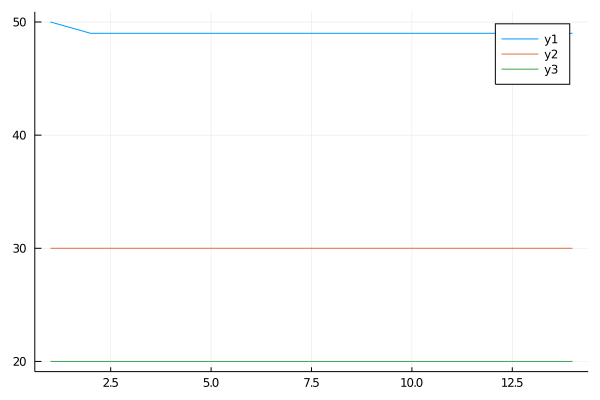

In [4]:
Params_in = Dict("ND"=>50, "NL"=>30, "NO"=>20, "NDteams"=>5, "NLteams"=>5, "NOteams"=>5,
                 "is_cohorts"=>true, "Pisol"=>0.5, "Psusc"=>1.0, "p_contact"=>(2.0/100),
                 "tD"=>0.05,"phi"=>0.1, "TeamTimes"=>[0.25,1.0,1.0], "TeamsOutside"=>[true,true,false],
                 "TeamDistances"=>[2.0,2.0,2.0], "HouseShareFactor"=>0.5, "CarShareFactor"=>1.0,
                 "SimType"=>Outbreak_sim, "InfInit"=>0)
PairParams = Dict("is_driver_pairs"=>true, "is_loader_pairs"=>true,
                  "fixed_driver_pairs"=>false, "fixed_loader_pairs"=>false,
                  "is_window_open"=>false)
Occ = ones(90)
NP = 3000*ones(Int64,90)
out = run_sim_delivery_wp(Params_in, Occ, NP; PairParams=PairParams)
plot(out["time"],out["Susceptible"][1,:])
plot!(out["time"],out["Susceptible"][2,:])
plot!(out["time"],out["Susceptible"][3,:])

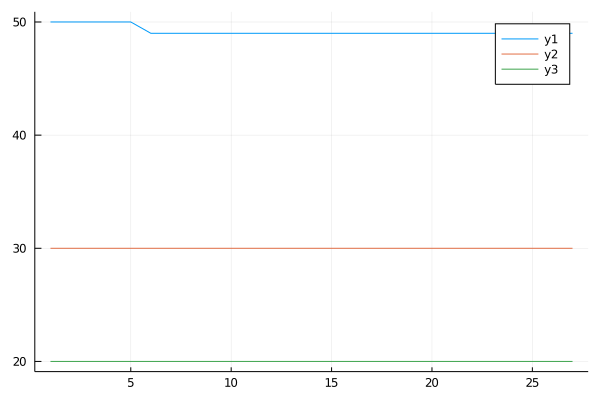

In [5]:
Params_in = Dict("ND"=>50, "NL"=>30, "NO"=>20, "NDteams"=>5, "NLteams"=>5, "NOteams"=>5,
                 "is_cohorts"=>true, "Pisol"=>0.5, "Psusc"=>1.0, "p_contact"=>(2.0/100),
                 "tD"=>0.05,"phi"=>0.1, "TeamTimes"=>[0.25,1.0,1.0], "TeamsOutside"=>[true,true,false],
                 "TeamDistances"=>[2.0,2.0,2.0], "HouseShareFactor"=>0.5, "CarShareFactor"=>1.0,
                 "SimType"=>Outbreak_sim, "InfInit"=>0)
PairParams = Dict("is_driver_pairs"=>true, "is_loader_pairs"=>true,
                  "fixed_driver_pairs"=>false, "fixed_loader_pairs"=>false,
                  "is_window_open"=>false)
PkgParams = Dict("p_fomite_trans"=>0.0001,"PkgHlife"=>1.0,"Ltime"=>2.0,"Dtime"=>8.0)
Occ = ones(90)
NP = 3000*ones(Int64,90)
out = run_sim_delivery_wp(Params_in, Occ, NP; PairParams=PairParams, PkgParams=PkgParams)
plot(out["time"],out["Susceptible"][1,:])
plot!(out["time"],out["Susceptible"][2,:])
plot!(out["time"],out["Susceptible"][3,:])

Profiling and benchmarking

In [8]:
?randsubseq

search: randsubseq randsubseq!



```
randsubseq([rng=GLOBAL_RNG,] A, p) -> Vector
```

Return a vector consisting of a random subsequence of the given array `A`, where each element of `A` is included (in order) with independent probability `p`. (Complexity is linear in `p*length(A)`, so this function is efficient even if `p` is small and `A` is large.) Technically, this process is known as "Bernoulli sampling" of `A`.

# Examples

```jldoctest
julia> rng = MersenneTwister(1234);

julia> randsubseq(rng, 1:8, 0.3)
2-element Array{Int64,1}:
 7
 8
```
